# WeatherPy
----


   The following analysis used weather information from Open Weather Map via the Open Weather map API to query and record maximum temperature, humidity, cloudiness, and wind speed for 574 world cities on January 5th, 2020. 
The python library citipy was used to retrieve the closest city near a pair of randomly generated latitude and longitude coordinates. The results of the analysis were plotted to visualize observable trends. 

#### Observed Trend One:
As expected, the highest temperatures observed in the sample of cities occurred in cities located between the latitudes 20 degrees north and south of the equator. As it is the middle of winter in the Northern Hemisphere, temperatures at equal distance from the equator are lower on average in positive latitudes than in negative latitudes. 

#### Observed Trend Two:
There does not seem to be trends of note in humidity, cloudiness, or wind speed. However, the majority of cities sampled experienced humidity over 40% and wind speeds less than 30 mph. Wind speed tended to be higher as city locations were farther away from the equator. 

#### Observed Trend Two:
Although the sample is representative of many different locations around the world, information for only one day was used. A bigger sample of data over a much longer period of time would be needed to provide more insight into world weather trends. 


## Analysis

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Create base url for data retrieval and specify other conditions
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
todaydate = time.strftime("%m.%d.%Y")

# Lists to create data frame
sampled_cities = []
country = []
date = []
lat = []
lng = []
temps = []
humidity = []
cloudiness = []
wind = []

# Initialize city count
count = 0

# Display API header
print("Begin Data Retrieval")
print("----------------------------")

# Loop through list of cities and perform data request for each
for city in cities:
    query_url= url + "appid=" + api_key +"&units=" + units + "&q="
    response = requests.get(query_url + city).json()
   
    # Create exception for cities not in OPW
    try:
    
        # Hide API key
        url_front = query_url[:53]
        url_back = query_url[85:]
        censor = ('*' * 32)
        print_url = url_front + censor + url_back
        
        # Append attributes for each city to lists
        sampled_cities.append(response['name'])
        country.append(response['sys']['country'])
        date.append(todaydate)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        count += 1
              
        print(f"Currently processing city number {count} | {city}, {response['sys']['country']}")
        print(print_url)
        
    except:
        print("City not found... Skipping")
        
print("----------------------------")
print("Data Retrieval Complete")

Begin Data Retrieval
----------------------------
Currently processing city number 1 | port hawkesbury, CA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 2 | orange walk, JM
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 3 | vaini, IN
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 4 | bayburt, TR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 5 | sitka, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 6 | tuktoyaktuk, CA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Sk

Currently processing city number 53 | xining, CN
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 54 | faanui, PF
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 55 | nikolskoye, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 56 | kokopo, PG
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 57 | dingle, PH
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 58 | sao joao da barra, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 59 | at

Currently processing city number 106 | puerto ayora, EC
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 107 | mustang, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 108 | elizabeth city, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 109 | portree, GB
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 110 | suntar, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 111 | rio grande, BR
http://api.openweathermap.org/data/2.5/weather?appid=**************************

Currently processing city number 158 | geraldton, CA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 159 | ingham, AU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 160 | longyearbyen, NO
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 161 | misawa, JP
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 162 | uray, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 163 | husavik, CA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units

Currently processing city number 210 | college, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 211 | halmaj, HU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 212 | itarema, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 213 | jijiga, ET
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 214 | hilo, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 215 | abu samrah, SY
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 216 | alugan, PH
http://api.openweather

Currently processing city number 263 | east london, ZA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 264 | carutapera, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 265 | hasaki, JP
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 266 | vardablur, AM
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 267 | svolvaer, NO
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 268 | cidreira, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 

Currently processing city number 314 | rapid valley, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 315 | tsaratanana, MG
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 316 | san ramon, NI
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
City not found... Skipping
Currently processing city number 317 | fortuna, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 318 | cockburn town, TC
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 319 | aquiraz, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city 

Currently processing city number 367 | pisz, PL
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 368 | inuvik, CA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 369 | filingue, NE
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 370 | krasnyy kholm, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 371 | balikpapan, ID
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 372 | idrinskoye, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 373 | abha, SA
http://api.op

Currently processing city number 419 | el viejo, NI
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 420 | bam, IR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 421 | galle, GN
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 422 | lourdes, SV
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 423 | wichita, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 424 | abu kamal, SY
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 425 | porosozero, RU
http://api.openweat

Currently processing city number 472 | moju, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 473 | chimore, BO
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 474 | necochea, AR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 475 | yazman, SY
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 476 | praia, BR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 477 | seoul, KR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 478 | buraydah, SA
http://api.openweathermap

Currently processing city number 524 | kurilsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 525 | viedma, AR
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 526 | cortez, US
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 527 | kharp, RU
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 528 | maldonado, UY
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 529 | svatove, UA
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=
Currently processing city number 530 | shubarshi, KZ
http://api.openweat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
# Build data frame from web API
weather_data = {"City": sampled_cities,
                "Country": country,
                "Date": date,
                "Max Temp": temps,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind,
                "Latitude": lat,
                "Lng": lng}

weather_df = pd.DataFrame(weather_data)

# Convert data to csv
weather_df.to_csv("cities.csv")

# Display dataframe
weather_df

,City,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Lng
0,Port Hawkesbury,CA,01.05.2020,30.00,86,90,21.92,45.62,-61.36
1,Orange Walk,JM,01.05.2020,80.60,78,20,10.29,17.93,-76.27
2,Vaini,IN,01.05.2020,66.20,88,75,4.70,15.34,74.49
3,Bayburt,TR,01.05.2020,12.42,90,100,5.64,40.26,40.22
4,Sitka,US,01.05.2020,36.00,53,0,1.01,37.17,-99.65
...,...,...,...,...,...,...,...,...,...
569,Mago,RU,01.05.2020,7.14,90,81,3.06,53.27,140.15
570,Petukhovo,RU,01.05.2020,10.72,95,100,9.95,55.06,67.89
571,Lamar,US,01.05.2020,33.80,47,1,10.29,38.09,-102.62
572,Ayni,TJ,01.05.2020,11.95,72,0,7.52,39.39,68.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

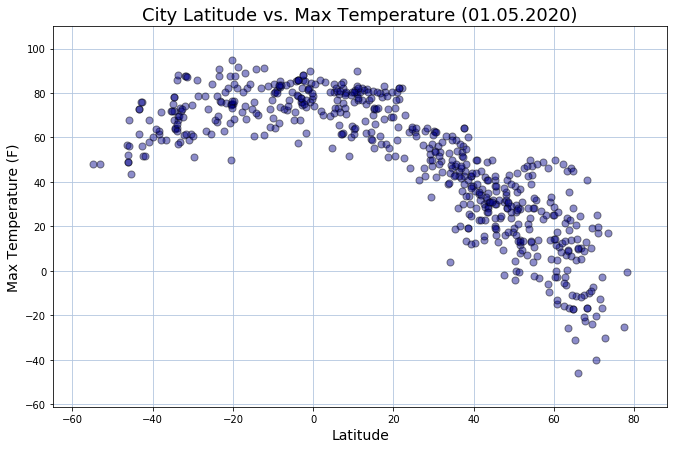

In [99]:
fixure, ax = plt.subplots(figsize=(11,7))

# Plot data
plt.scatter(lat, temps, marker="o", s=50, facecolors="darkblue", edgecolors="black", alpha=0.45, zorder=2)
plt.grid(color="lightsteelblue",zorder=0)

# Annotate graph
plt.title(f"City Latitude vs. Max Temperature ({date[0]})", fontsize=18)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=14)

plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(temps)-15, max(temps)+15)

# Save plot
plt.savefig("plots/MaxTemp.png")

#### Latitude vs. Humidity Plot

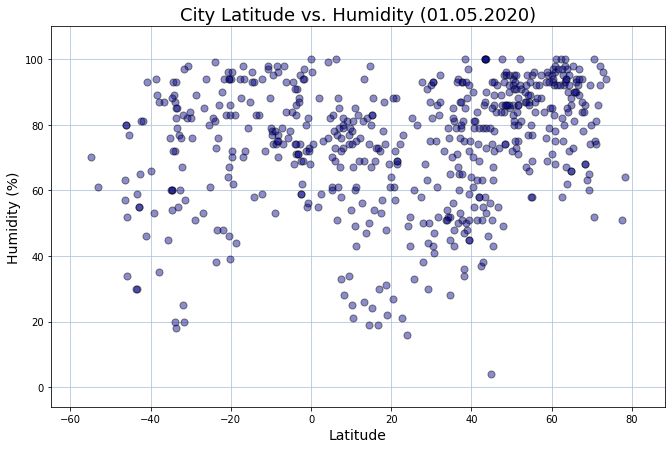

In [100]:
fixure, ax = plt.subplots(figsize=(11,7))

# Plot data
plt.scatter(lat, humidity, marker="o", s=50, facecolors="darkblue", edgecolors="black", alpha=0.45, zorder=2)
plt.grid(color="lightsteelblue",zorder=0)

# Annotate graph
plt.title(f"City Latitude vs. Humidity ({date[0]})", fontsize=18)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)

plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)

# Save plot
plt.savefig("plots/Humidity.png")

#### Latitude vs. Cloudiness Plot

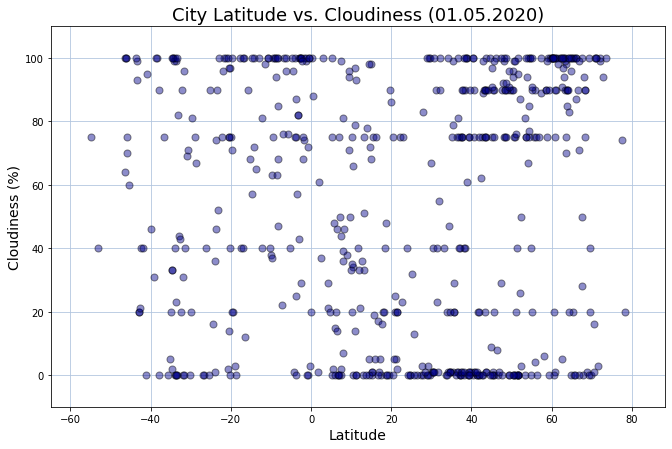

In [101]:
fixure, ax = plt.subplots(figsize=(11,7))

# Plot data
plt.scatter(lat, cloudiness, marker="o", s=50, facecolors="darkblue", edgecolors="black", alpha=0.45, zorder=2)
plt.grid(color="lightsteelblue",zorder=0)

# Annotate graph
plt.title(f"City Latitude vs. Cloudiness ({date[0]})", fontsize=18)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)

plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)

# Save plot
plt.savefig("plots/Cloudiness.png")

#### Latitude vs. Wind Speed Plot

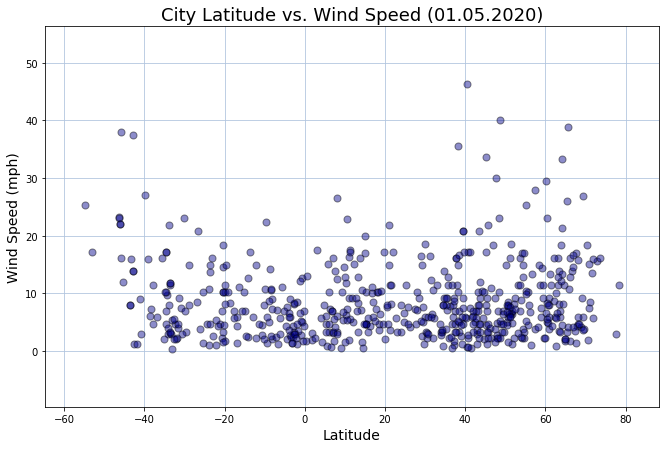

In [102]:
fixure, ax = plt.subplots(figsize=(11,7))

# Plot data
plt.scatter(lat, wind, marker="o", s=50, facecolors="darkblue", edgecolors="black", alpha=0.45, zorder=2)
plt.grid(color="lightsteelblue",zorder=0)

# Annotate graph
plt.title(f"City Latitude vs. Wind Speed ({date[0]})", fontsize=18)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)

plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind)-10, max(wind)+10)

# Save plot
plt.savefig("plots/WindSpeed.png")